# Importing dependencies

In [1]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

# Creating environment

In [2]:
env = gym.make("FrozenLake-v1")

# env = gym.make("FrozenLake-v1", is_slippery=False)
print("Size of action space: ", env.action_space.n)
print("Size of state space: ", env.observation_space.n)
print("Potential rewards: ", env.reward_range)

Size of action space:  4
Size of state space:  16
Potential rewards:  (0, 1)


# Creating Q-Table

In [3]:
# q-table: rows-->state_space(all possible states)  columns-->action_space(all possible actions)
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


# Initialize paramaters of Q-Learning algorithm

In [8]:
num_episodes = 20000
max_steps_per_episode = 100

learning_rate = 0.1    #alpha
discount_rate = 0.99   #gamma

exploration_rate = 1              #epsilon
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001     

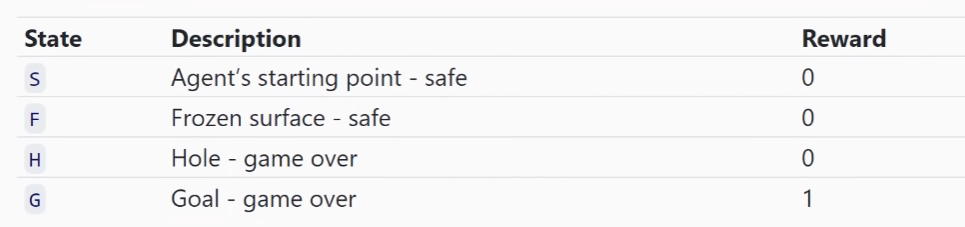

# Q-Learning algorithm

In [12]:
rewards_all_episodes = []

# Q-Learning algorithm

for episode in range(num_episodes):
    state = env.reset()[0]
    
    done = False
    rewards_current_episode = 0
    for step in range(max_steps_per_episode):
        
        exploration_rate_threshold = random.uniform(0,1)
        
        # to decide explore or exploit the environment
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:])  # exploit
        else:
            action = env.action_space.sample()    # random choice explore
            
        new_state, reward, done, truncated, info = env.step(action)
        
        # Update Q-table for Q(s,a)
        
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
                                learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
            
        state = new_state
        rewards_current_episode += reward
        
        if done==True:
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
                    (max_exploration_rate - min_exploration_rate)* np.exp(-exploration_decay_rate*episode)

    rewards_all_episodes.append(rewards_current_episode)


In [13]:
# calculate avg reward per thousand episodes
rewards_per_thousand_episodes =  np.split(np.array(rewards_all_episodes), num_episodes/1000)
count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  0.06400000000000004
2000 :  0.18400000000000014
3000 :  0.3850000000000003
4000 :  0.5550000000000004
5000 :  0.6210000000000004
6000 :  0.6520000000000005
7000 :  0.6880000000000005
8000 :  0.6780000000000005
9000 :  0.6720000000000005
10000 :  0.6990000000000005
11000 :  0.6790000000000005
12000 :  0.7140000000000005
13000 :  0.6830000000000005
14000 :  0.7230000000000005
15000 :  0.6680000000000005
16000 :  0.6950000000000005
17000 :  0.6950000000000005
18000 :  0.6540000000000005
19000 :  0.6620000000000005
20000 :  0.6530000000000005


In [14]:
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[0.51693902 0.49530147 0.49117383 0.4999015 ]
 [0.31917419 0.35684839 0.3006781  0.47454326]
 [0.41394798 0.4120351  0.40483213 0.44644921]
 [0.30034187 0.25593031 0.34499937 0.43317921]
 [0.53488267 0.49191841 0.31016327 0.37973809]
 [0.         0.         0.         0.        ]
 [0.17363272 0.12847632 0.34423403 0.08517406]
 [0.         0.         0.         0.        ]
 [0.42084614 0.42234145 0.28238583 0.55669727]
 [0.31864605 0.60932087 0.455619   0.51262673]
 [0.58274097 0.35545918 0.33641745 0.25019084]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.5354444  0.46091722 0.67420569 0.27133698]
 [0.70269292 0.80020049 0.75361985 0.75737869]
 [0.         0.         0.         0.        ]]
